In [1]:
import os
import tensorflow as tf
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
# Configs
class CFG:
    #Random seed
    SEED = 42
    BASE = os.getcwd()
    dataset_name = "tf_flowers"
    early_stopping_patience = 3
    # Define hyperparameters
    RESIZE_TO = 384
    CROP_TO = 224
    BATCH_SIZE = 64
    STEPS_PER_EPOCH = 10
    AUTO = tf.data.AUTOTUNE  # optimise the pipeline performance
    NUM_CLASSES = 5  # number of classes
    SCHEDULE_LENGTH = (
        500  # we will train on lower resolution images and will still attain good results
    )
    SCHEDULE_BOUNDARIES = [
        200,
        300,
        400,
    ]  # more the dataset size the schedule length increase

2023-06-24 19:51:50.348095: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-24 19:51:50.372704: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 19:51:50.759303: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#Standart libs
import matplotlib.pyplot as plt
%matplotlib inline
import random
import os
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [3]:
import tensorflow as tf
import numpy as np
import random
import os
from tensorflow.keras import backend as K

def set_seed(seed=42):
    # Set the Python hash seed
    os.environ['PYTHONHASHSEED']=str(seed)
    os.environ['TF_NUM_INTRAOP_THREADS'] = str(seed)
    # Set the Python, Numpy and Tensorflow random seeds
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.compat.v1.set_random_seed(seed)
    # Set deterministic options for Tensorflow
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    # Limit Tensorflow to single thread for full reproducibility
    tf.config.threading.set_inter_op_parallelism_threads(1)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)
    print('seeding done!!!')
set_seed(CFG.SEED)

2023-06-24 19:51:51.695028: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-24 19:51:51.710287: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-24 19:51:51.710388: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf


seeding done!!!


2023-06-24 19:51:52.267448: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-24 19:51:52.267561: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-24 19:51:52.267611: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Gather Flower Dataset

In [4]:
train_ds, validation_ds = tfds.load(
    "tf_flowers",
    split=["train[:85%]", "train[85%:]"],
    as_supervised=True,
)

2023-06-24 19:51:52.433054: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-24 19:51:52.433212: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-24 19:51:52.433260: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Visualise the dataset

2023-06-24 19:51:52.672908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2]
	 [[{{node Placeholder/_0}}]]
2023-06-24 19:51:52.673088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [2]
	 [[{{node Placeholder/_1}}]]
2023-06-24 19:51:52.766610: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline 

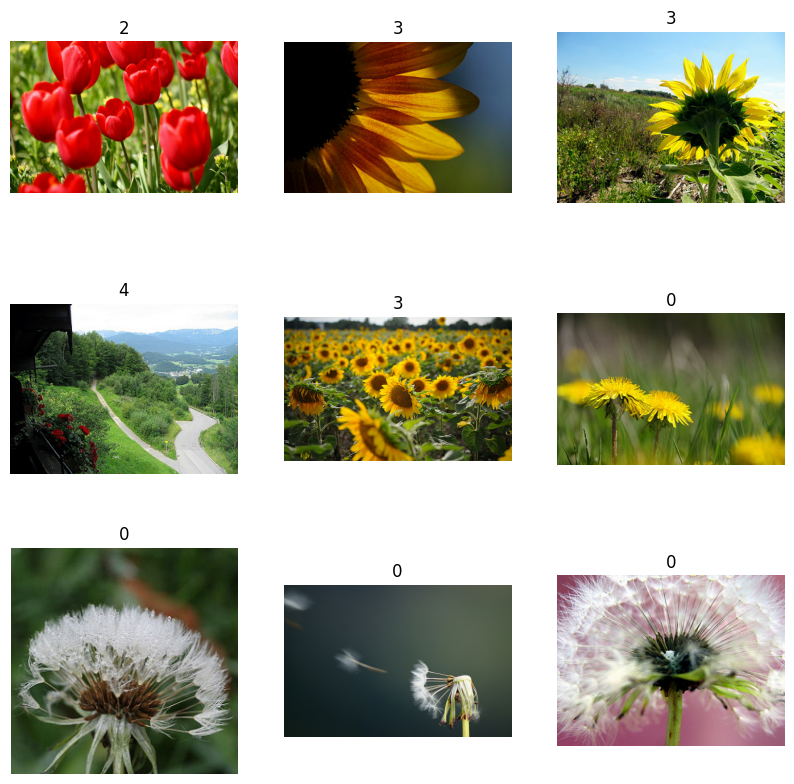

In [5]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

# Define preprocessing helper functions

In [6]:
SCHEDULE_LENGTH = CFG.SCHEDULE_LENGTH * 512 / CFG.BATCH_SIZE


@tf.function
def preprocess_train(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.resize(image, (CFG.RESIZE_TO, CFG.RESIZE_TO))
    image = tf.image.random_crop(image, (CFG.CROP_TO, CFG.CROP_TO, 3))
    image = image / 255.0
    return (image, label)


@tf.function
def preprocess_test(image, label):
    image = tf.image.resize(image, (CFG.RESIZE_TO, CFG.RESIZE_TO))
    image = image / 255.0
    return (image, label)


DATASET_NUM_TRAIN_EXAMPLES = train_ds.cardinality().numpy()

repeat_count = int(
    CFG.SCHEDULE_LENGTH * CFG.BATCH_SIZE / DATASET_NUM_TRAIN_EXAMPLES * CFG.STEPS_PER_EPOCH
)
repeat_count += 50 + 1  # To ensure at least there are 50 epochs of training

# Define the data pipeline

In [7]:
# Training pipeline
pipeline_train = (
    train_ds.shuffle(10000)
    .repeat(repeat_count)  # Repeat dataset_size / num_steps
    .map(preprocess_train, num_parallel_calls=CFG.AUTO)
    .batch(CFG.BATCH_SIZE)
    .prefetch(CFG.AUTO)
)

# Validation pipeline
pipeline_validation = (
    validation_ds.map(preprocess_test, num_parallel_calls=CFG.AUTO)
    .batch(CFG.BATCH_SIZE)
    .prefetch(CFG.AUTO)
)


# Visualise the training samples

2023-06-24 19:51:53.131900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int64 and shape [2]
	 [[{{node Placeholder/_2}}]]
2023-06-24 19:51:53.132132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int64 and shape [2]
	 [[{{node Placeholder/_2}}]]


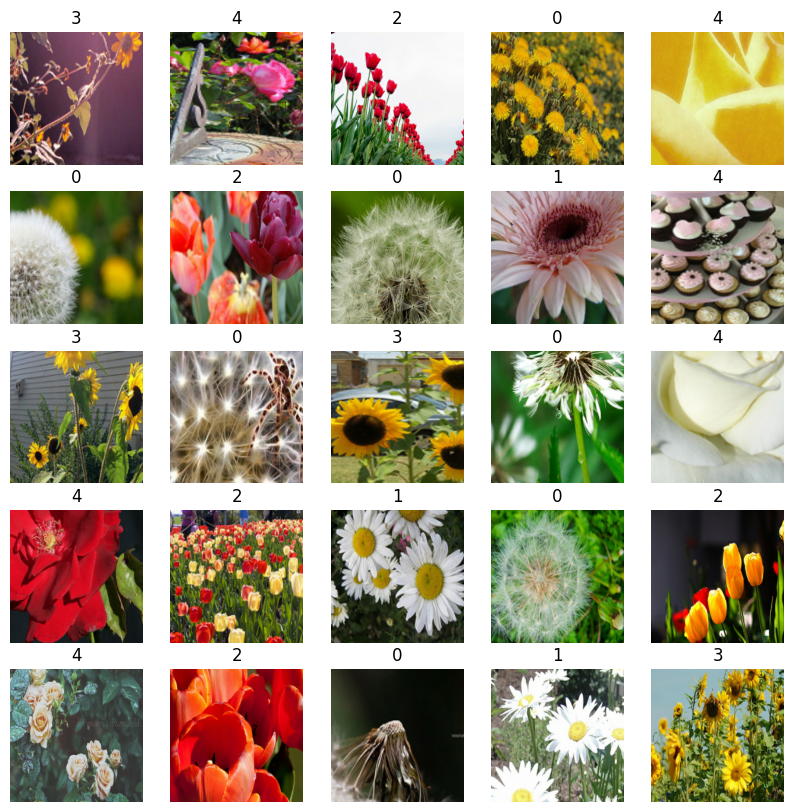

In [8]:
image_batch, label_batch = next(iter(pipeline_train))

plt.figure(figsize=(10, 10))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(image_batch[n])
    plt.title(label_batch[n].numpy())
    plt.axis("off")

# Load pretrained TF-Hub model into a KerasLayer

In [9]:
bit_model_url = "https://tfhub.dev/google/bit/m-r50x1/1"
bit_module = hub.KerasLayer(bit_model_url)

# Create BigTransfer (BiT) model

In [10]:
class MyBiTModel(tf.keras.Model):
    def __init__(self, num_classes, module, **kwargs):
        super().__init__(**kwargs)

        self.num_classes = num_classes
        self.head = tf.keras.layers.Dense(num_classes, kernel_initializer="zeros")
        self.bit_model = module

    def call(self, images):
        bit_embedding = self.bit_model(images)
        return self.head(bit_embedding)


model = MyBiTModel(num_classes=CFG.NUM_CLASSES, module=bit_module)

# Define optimizer and loss

In [11]:
learning_rate = 0.003 * CFG.BATCH_SIZE / 512

# Decay learning rate by a factor of 10 at SCHEDULE_BOUNDARIES.
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=CFG.SCHEDULE_BOUNDARIES,
    values=[
        learning_rate,
        learning_rate * 0.1,
        learning_rate * 0.01,
        learning_rate * 0.001,
    ],
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile the model

In [12]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

# Set up callbacks

In [13]:
reduceLROnPlat = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                      factor=0.7,
                                                      min_delta=0.001,
                                                      patience=3,
                                                      verbose=1,
                                                      mode="auto")

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=CFG.early_stopping_patience,
    restore_best_weights=True,
    min_delta=0.001,
)

# Train the model

In [14]:
history = model.fit(
    pipeline_train,
    batch_size=CFG.BATCH_SIZE,
    epochs=int(CFG.SCHEDULE_LENGTH / CFG.STEPS_PER_EPOCH),
    steps_per_epoch=CFG.STEPS_PER_EPOCH,
    validation_data=pipeline_validation,
    callbacks=[early_stopping,reduceLROnPlat],
)

Epoch 1/50


2023-06-24 19:51:59.534488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/global_average_pooling2d/PartitionedCall_grad/global_average_pooling2d/PartitionedCall' with dtype float and shape [?,?,?,?]
	 [[{{node gradients/global_average_pooling2d/PartitionedCall_grad/global_average_pooling2d/PartitionedCall}}]]
2023-06-24 19:51:59.534531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/global_average_pooling2d/PartitionedCall_grad/global_average_pooling2d/PartitionedCall_1' with dtype int32 and shape [2]
	 [[{{node gradients/global_average_pooling2d/PartitionedCall_grad/global_average_pooling2d/Part

2023-06-24 19:51:59.983509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/block4/StatefulPartitionedCall_grad/block4/StatefulPartitionedCall' with dtype float and shape [?,?,?,2048]
	 [[{{node gradients/block4/StatefulPartitionedCall_grad/block4/StatefulPartitionedCall}}]]
2023-06-24 19:51:59.983553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/block4/StatefulPartitionedCall_grad/block4/StatefulPartitionedCall_1' with dtype float and shape [?,?,?,2048]
	 [[{{node gradients/block4/StatefulPartitionedCall_grad/block4/StatefulPartitionedCall_1}}]]
2023-06-24 19:51:59.983571: I tensorflow/core/comm

2023-06-24 19:52:00.780560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/block3/StatefulPartitionedCall_grad/block3/StatefulPartitionedCall' with dtype float and shape [?,?,?,1024]
	 [[{{node gradients/block3/StatefulPartitionedCall_grad/block3/StatefulPartitionedCall}}]]
2023-06-24 19:52:00.780604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/block3/StatefulPartitionedCall_grad/block3/StatefulPartitionedCall_1' with dtype float and shape [?,?,?,1024]
	 [[{{node gradients/block3/StatefulPartitionedCall_grad/block3/StatefulPartitionedCall_1}}]]
2023-06-24 19:52:00.780623: I tensorflow/core/comm

2023-06-24 19:52:01.507891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/block2/StatefulPartitionedCall_grad/block2/StatefulPartitionedCall' with dtype float and shape [?,?,?,512]
	 [[{{node gradients/block2/StatefulPartitionedCall_grad/block2/StatefulPartitionedCall}}]]
2023-06-24 19:52:01.507938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/block2/StatefulPartitionedCall_grad/block2/StatefulPartitionedCall_1' with dtype float and shape [?,?,?,512]
	 [[{{node gradients/block2/StatefulPartitionedCall_grad/block2/StatefulPartitionedCall_1}}]]
2023-06-24 19:52:01.507956: I tensorflow/core/common

2023-06-24 19:52:01.916723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/block1/StatefulPartitionedCall_grad/block1/StatefulPartitionedCall' with dtype float and shape [?,?,?,256]
	 [[{{node gradients/block1/StatefulPartitionedCall_grad/block1/StatefulPartitionedCall}}]]
2023-06-24 19:52:01.916765: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/block1/StatefulPartitionedCall_grad/block1/StatefulPartitionedCall_1' with dtype float and shape [?,?,?,256]
	 [[{{node gradients/block1/StatefulPartitionedCall_grad/block1/StatefulPartitionedCall_1}}]]
2023-06-24 19:52:01.916783: I tensorflow/core/common

2023-06-24 19:52:02.183993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall' with dtype float and shape [?,?,?,?]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall}}]]
2023-06-24 19:52:02.184042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_1' with dtype int32 and shape [2]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_1}}]]
2023-06-24 19:52:02.184062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor s

2023-06-24 19:52:02.452913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall' with dtype float and shape [?,?,?,?]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall}}]]
2023-06-24 19:52:02.452967: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_1' with dtype int32 and shape [2]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_1}}]]
2023-06-24 19:52:02.452988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor s

2023-06-24 19:52:04.610064: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


 2/10 [=====>........................] - ETA: 0s - loss: 1.5231 - accuracy: 0.4375 

2023-06-24 19:52:05.178954: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-24 19:52:05.240207: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f57c0c0bb10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-24 19:52:05.240222: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2023-06-24 19:52:05.272211: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 [==============================] - ETA: 0s - loss: 0.7380 - accuracy: 0.7891

2023-06-24 19:52:05.858263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]
2023-06-24 19:52:05.858493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]


10/10 [==============================] - 9s 320ms/step - loss: 0.7380 - accuracy: 0.7891 - val_loss: 0.1855 - val_accuracy: 0.9564 - lr: 3.7500e-04
Epoch 2/50
10/10 [==============================] - 2s 238ms/step - loss: 0.1453 - accuracy: 0.9547 - val_loss: 0.1139 - val_accuracy: 0.9691 - lr: 3.7500e-04
Epoch 3/50
10/10 [==============================] - 2s 242ms/step - loss: 0.1601 - accuracy: 0.9469 - val_loss: 0.0849 - val_accuracy: 0.9709 - lr: 3.7500e-04
Epoch 4/50
10/10 [==============================] - 2s 236ms/step - loss: 0.1205 - accuracy: 0.9594 - val_loss: 0.0828 - val_accuracy: 0.9655 - lr: 3.7500e-04
Epoch 5/50
10/10 [==============================] - 2s 240ms/step - loss: 0.1438 - accuracy: 0.9406 - val_loss: 0.0786 - val_accuracy: 0.9745 - lr: 3.7500e-04
Epoch 6/50
10/10 [==============================] - 2s 240ms/step - loss: 0.1238 - accuracy: 0.9500 - val_loss: 0.0756 - val_accuracy: 0.9764 - lr: 3.7500e-04
Epoch 7/50
10/10 [==============================] - 2s 23

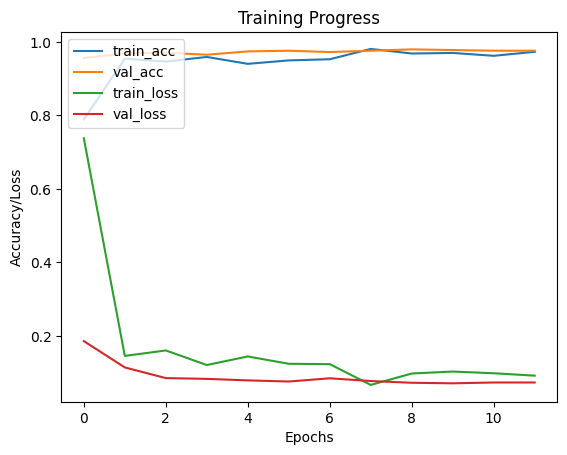

In [15]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Accuracy/Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc", "train_loss", "val_loss"], loc="upper left")
    plt.show()


plot_hist(history)

# Evaluate the model

In [16]:
accuracy = model.evaluate(pipeline_validation)[1] * 100
print("Accuracy: {:.2f}%".format(accuracy))

9/9 [==============================] - 2s 176ms/step - loss: 0.0722 - accuracy: 0.9800
Accuracy: 98.00%


In [17]:
y_pred = model.predict(pipeline_validation.take(1))

2023-06-24 19:52:34.217762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int64 and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-06-24 19:52:34.217983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]


1/1 [==============================] - 1s 523ms/step


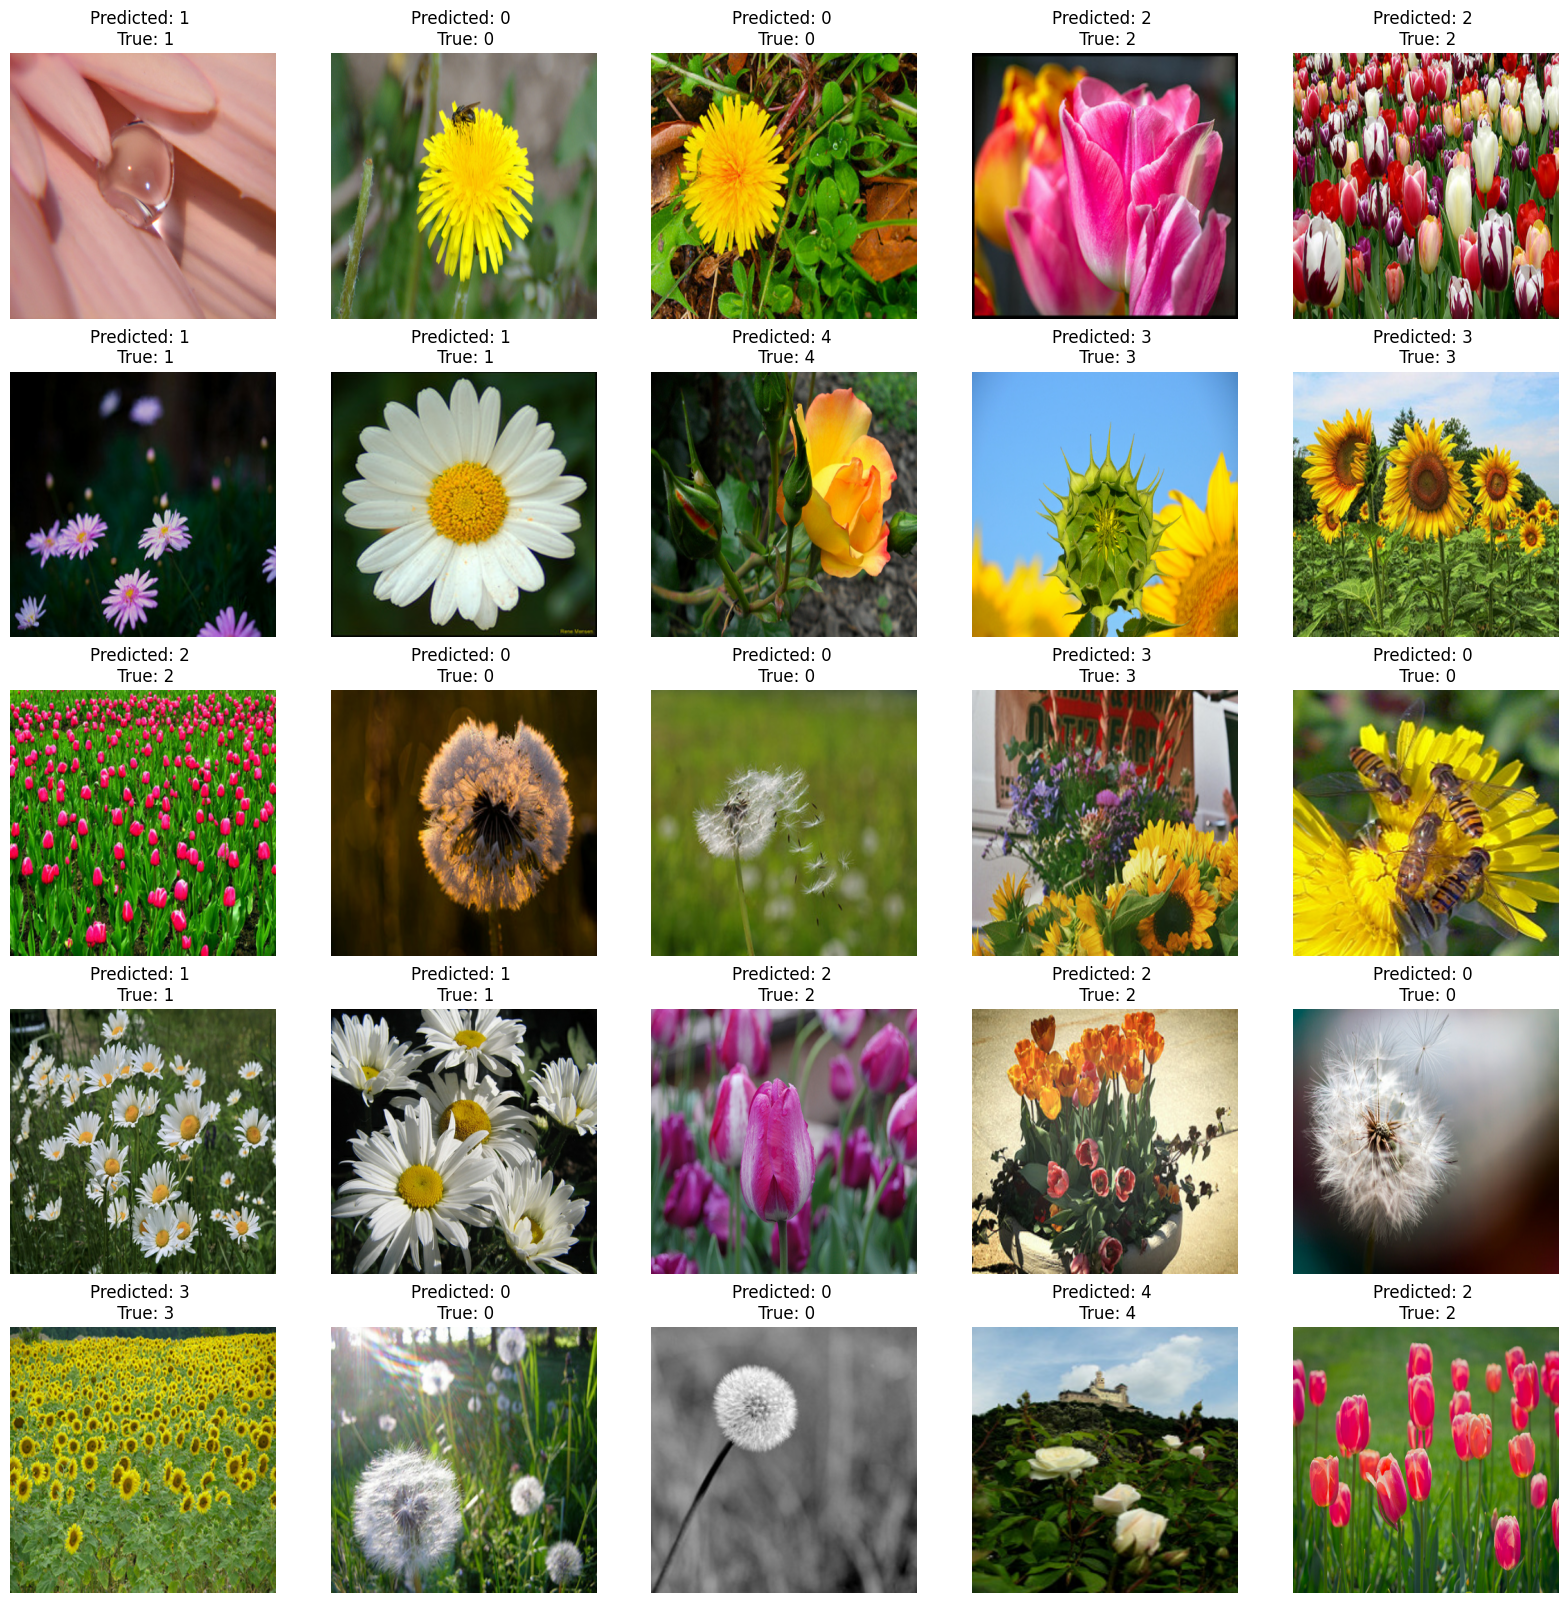

In [18]:
image_batch, label_batch = next(iter(pipeline_validation))

plt.figure(figsize=(20, 20))
for n in range(25):
    ax = plt.subplot(5, 5, n + 1)
    plt.imshow(image_batch[n])
#     plt.title(label_batch[n].numpy())
#     print(np.argmax(y_pred[n]))
    plt.title(f"Predicted: {np.argmax(y_pred[n])} \n True: {label_batch[n].numpy()}")
    plt.axis("off")